# Economic Analysis Project

Importing Necessary Library - API Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

#installing Libraries some other important libraries for project
#1. pip install fredapi
#2. pip install plotly

pd.set_option("display.max_columns", 500)
plt.style.use('fivethirtyeight')

# API Key Importing
from dotenv import load_dotenv
import os

load_dotenv()
fred_api_key = os.getenv("API_KEY")


### 1. Create the 'FRED' Object.
- This object will be used to search and pull data from website.
- Fred allows us to do search the data and pull down the data.

In [3]:
fred = Fred(api_key=fred_api_key)
fred

### 2. Searching for Economic Data
- This search is similar to how we search on website searchbar but its more pythonic and in pandas.
- we will use `object.search` for economic data.
- Search Results are sorted by 'popularity'

In [4]:
s_p_search = fred.search('S&P', order_by='popularity')
s_p_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2026-02-05,2026-02-05,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2026-02-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-05 09:18:18-06:00,100,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2026-02-05,2026-02-05,S&P 500,2016-02-05,2026-02-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-04 19:02:02-06:00,90,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-05,2026-02-05,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2026-02-05,2026-02-05,ICE BofA US High Yield Index Effective Yield,1996-12-31,2026-02-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-05 09:18:17-06:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2026-02-05,2026-02-05,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2026-02-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-05 09:18:55-06:00,85,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCIYISDOA066NRUG,HCIYISDOA066NRUG,2026-02-05,2026-02-05,Index of Human Capital per Person for Dominica...,1951-01-01,2023-01-01,Annual,A,Index,Index,Not Seasonally Adjusted,NSA,2026-02-04 11:47:39-06:00,3,"Index of human capital per person, based on ye..."
PLGDPEAMA670NRUG,PLGDPEAMA670NRUG,2026-02-05,2026-02-05,Price level of Expenditure-side Real GDP at Cu...,1990-01-01,2011-01-01,Annual,A,Price Level of USA Output-side GDP in 2005=1,Price Level of USA Output-side GDP in 2005=1,Not Seasonally Adjusted,NSA,2013-08-12 12:19:56-05:00,3,Source ID: pl_gdpe When using these data in y...
DDDM01UAA156NWDB,DDDM01UAA156NWDB,2026-02-05,2026-02-05,Stock Market Capitalization to GDP for Ukraine,2010-01-01,2018-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:32:58-05:00,3,Total value of all listed shares in a stock ma...


In [5]:
s_p_search.shape

(1000, 15)

In [6]:
s_p_search.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2026-02-05,2026-02-05,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2026-02-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-05 09:18:18-06:00,100,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2026-02-05,2026-02-05,S&P 500,2016-02-05,2026-02-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-04 19:02:02-06:00,90,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-05,2026-02-05,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2026-02-05,2026-02-05,ICE BofA US High Yield Index Effective Yield,1996-12-31,2026-02-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-05 09:18:17-06:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2026-02-05,2026-02-05,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2026-02-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-05 09:18:55-06:00,85,The ICE BofA Option-Adjusted Spreads (OASs) ar...
DJIA,DJIA,2026-02-05,2026-02-05,Dow Jones Industrial Average,2016-02-05,2026-02-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-02-04 19:04:55-06:00,77,The observations for the Dow Jones Industrial ...
STLENI,STLENI,2026-02-05,2026-02-05,St. Louis Fed Economic News Index: Real GDP No...,2013-04-01,2025-10-01,Quarterly,Q,Percent Change at Annual Rate,% Chg. at Annual Rate,Seasonally Adjusted Annual Rate,SAAR,2026-01-30 09:50:27-06:00,74,St. Louis Fed’s Economic News Index (ENI) uses...
CSUSHPISA,CSUSHPISA,2026-02-05,2026-02-05,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2026-01-27 08:15:29-06:00,74,"For more information regarding the index, plea..."
MEHOINUSA646N,MEHOINUSA646N,2026-02-05,2026-02-05,Median Household Income in the United States,1984-01-01,2024-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2025-09-09 13:19:03-05:00,74,Household data are collected as of March. As ...


### 3. Pulling Raw Data And Plotting

<Axes: title={'center': 'S&P 500'}>

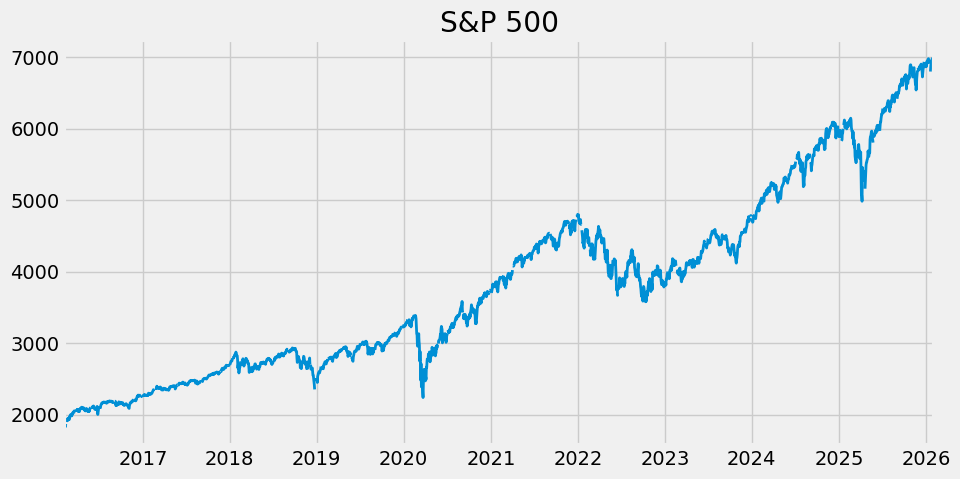

In [7]:
# Pulling using object.get_series and providing id of series
sp500_data = fred.get_series(series_id='SP500')

# Plotting 
sp500_data.plot(figsize=(10,5), title='S&P 500', linewidth=2)

### 4. Pull and Join Multiple Data Series
- Pulling Unemployment Rate Datasets.


In [8]:
uemp_data = fred.search('unemployement', order_by='popularity')
uemp_data

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2026-02-05,2026-02-05,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2025-12-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2026-01-13 08:08:07-06:00,98,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2026-02-05,2026-02-05,Unemployment Rate,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:10:37-06:00,98,The unemployment rate represents the number of...
SAHMREALTIME,SAHMREALTIME,2026-02-05,2026-02-05,Real-time Sahm Rule Recession Indicator,1959-12-01,2025-12-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2026-01-09 08:23:02-06:00,87,Sahm Recession Indicator signals the start of ...
PAYEMS,PAYEMS,2026-02-05,2026-02-05,"All Employees, Total Nonfarm",1939-01-01,2025-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2026-01-09 08:11:04-06:00,85,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2026-02-05,2026-02-05,Initial Claims,1967-01-07,2026-01-31,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2026-02-05 07:35:31-06:00,82,An initial claim is a claim filed by an unempl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DESM719URN,DESM719URN,2026-02-05,2026-02-05,Unemployment Rate in Des Moines-West Des Moine...,1990-01-01,2025-11-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2026-01-16 13:20:49-06:00,6,None
LRUN24FEJPQ156S,LRUN24FEJPQ156S,2026-02-05,2026-02-05,Infra-Annual Labor Statistics: Unemployment Ra...,1970-01-01,2025-07-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2025-11-17 12:49:48-06:00,6,OECD Data Filters: REF_AREA: JPN MEASURE: UNE...
LNS14024886,LNS14024886,2026-02-05,2026-02-05,"Unemployment Rate - 16-24 Yrs., Women",1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:12:59-06:00,6,To obtain estimates of women worker employment...


**Pulling Unrate Dataset**

In [9]:
unrate_dataset = fred.get_series('UNRATE')

unrate_dataset

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2025-08-01    4.3
2025-09-01    4.4
2025-10-01    NaN
2025-11-01    4.5
2025-12-01    4.4
Length: 936, dtype: float64

**Plotting Unrate**

<Axes: >

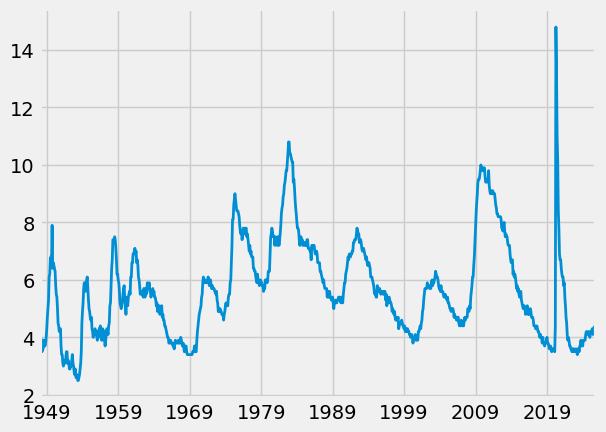

In [10]:
unrate_dataset.plot(lw=2)

- filtering down more precisely dataset that has unemployement rate and not monthly adjusted.
- locating unemployement rate where title is `Unemployement Rate`.

In [11]:
unemp_df = fred.search('unemployement rate state', filter=('frequency','Monthly'))
unemp_df= unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2026-02-05,2026-02-05,Unemployment Rate,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:10:37-06:00,98,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2026-02-05,2026-02-05,Unemployment Rate - Black or African American,1972-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:03-06:00,68,The series comes from the 'Current Population ...
CAUR,CAUR,2026-02-05,2026-02-05,Unemployment Rate in California,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:30-06:00,64,None
LNS14024887,LNS14024887,2026-02-05,2026-02-05,Unemployment Rate - 16-24 Yrs.,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:12:38-06:00,64,The series comes from the 'Current Population ...
LNS14000024,LNS14000024,2026-02-05,2026-02-05,Unemployment Rate - 20 Yrs. & over,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:14-06:00,57,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARUR,ARUR,2026-02-05,2026-02-05,Unemployment Rate in Arkansas,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:22-06:00,29,None
PRUR,PRUR,2026-02-05,2026-02-05,Unemployment Rate in Puerto Rico,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:05-06:00,27,None
HIUR,HIUR,2026-02-05,2026-02-05,Unemployment Rate in Hawaii,1976-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-28 09:48:13-06:00,25,None


In [12]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

all_results

[            UNRATE
 1948-01-01     3.4
 1948-02-01     3.8
 1948-03-01     4.0
 1948-04-01     3.9
 1948-05-01     3.5
 ...            ...
 2025-08-01     4.3
 2025-09-01     4.4
 2025-10-01     NaN
 2025-11-01     4.5
 2025-12-01     4.4
 
 [936 rows x 1 columns],
             U6RATE
 1994-01-01    11.7
 1994-02-01    11.4
 1994-03-01    11.5
 1994-04-01    11.3
 1994-05-01    10.9
 ...            ...
 2025-08-01     8.1
 2025-09-01     8.1
 2025-10-01     NaN
 2025-11-01     8.7
 2025-12-01     8.4
 
 [384 rows x 1 columns],
             LNS14000006
 1972-01-01         11.2
 1972-02-01         11.2
 1972-03-01         10.7
 1972-04-01          9.8
 1972-05-01         10.2
 ...                 ...
 2025-08-01          7.6
 2025-09-01          7.6
 2025-10-01          NaN
 2025-11-01          8.2
 2025-12-01          7.5
 
 [648 rows x 1 columns],
             CAUR
 1976-01-01   9.2
 1976-02-01   9.2
 1976-03-01   9.1
 1976-04-01   9.0
 1976-05-01   8.9
 ...          ...
 2025-08-01  

In [13]:
#Dropped unnecessary columns and Null Values
unemp_states = pd.concat(all_results, axis=1).drop(['UNRATE','LNS14000006', 'LNS14024887', 'LNS14000024', 'LNS14000002', 
                                     'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14027662', 'LNS14000036',
                                     'LNS14000003', 'LNS14000009', 'LNS14000001', 'LNS14000031', 'LNS14000012', 'LNS14027660',
                                     'LNS13025703', 'LNS14027659', 'LNS14000032', 'LNS14000060', 'LASMT261982000000003',
                                     'LASMT534266000000003', 'LBSSA13', 'LBSSA01', 'LBSSA22', 'LBSSA28',
                                      'LNS14032183','U6RATE', 'U2RATE', 'U4RATE', 'U5RATE', 'U1RATE'], axis=1)
unemp_states = unemp_states.dropna()

#Here we are mapping id to State Names: 

id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

**Plotting Unemployement State dataframe**
- Plotly will filter out states.

In [14]:
px.line(unemp_states)

#### Pull Jan 1983 Unemployement Rate Per State

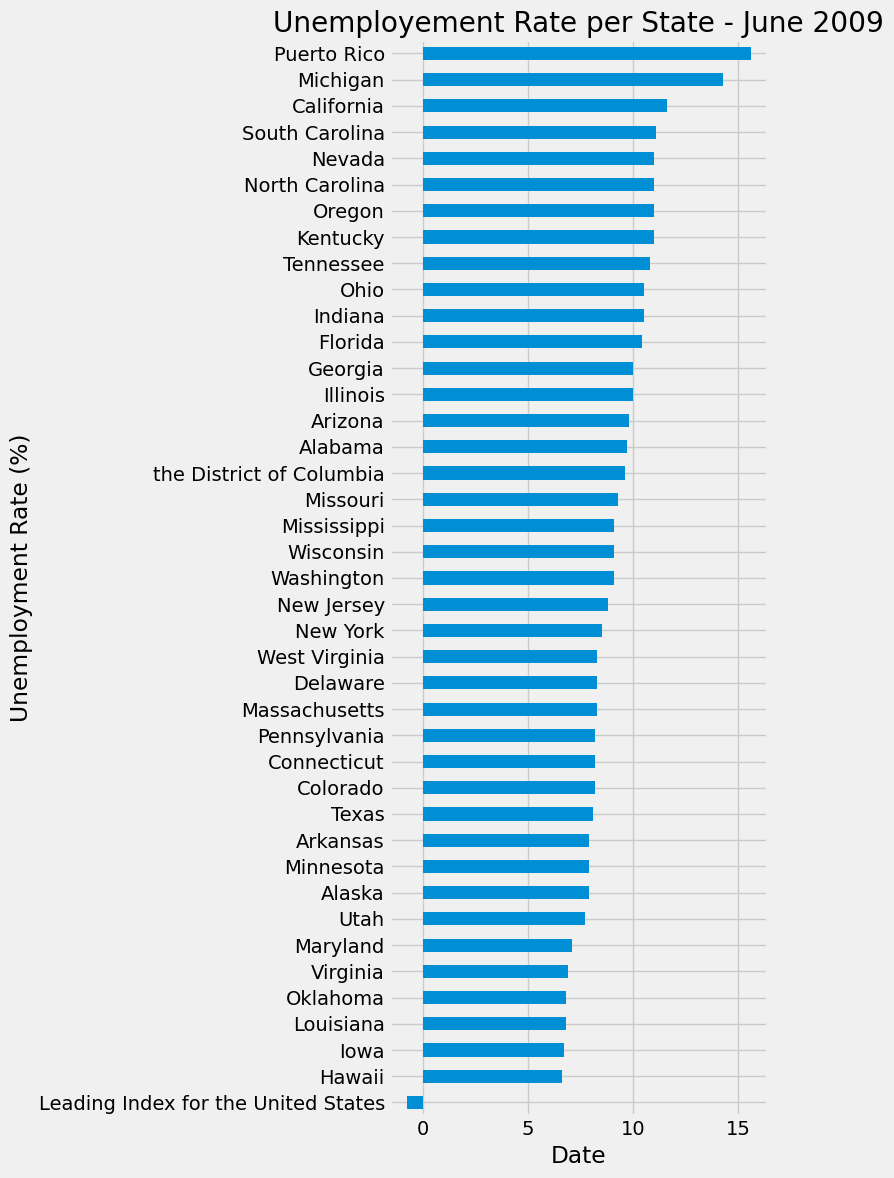

In [18]:
ax = unemp_states.loc[unemp_states.index == '2009-06-01'].T.sort_values('2009-06-01').plot(kind='barh', figsize=(8,12))
ax.set_title("Unemployement Rate per State - June 2009")
ax.set_xlabel("Date")
ax.set_ylabel("Unemployment Rate (%)")
ax.legend().remove()
plt.tight_layout()
plt.show()

## Pull Participation Rate Data
- Participation Rate is opposite of unemployement rate.
- Similar mapping work of unemployment rate will be done for Participation Rate.

In [16]:
participation_df = fred.search('participation rate state', filter=('frequency','Monthly'))
participation_df= participation_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
participation_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2026-02-05,2026-02-05,Labor Force Participation Rate,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:34-06:00,82,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2026-02-05,2026-02-05,Labor Force Participation Rate - Women,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:20-06:00,64,To obtain estimates of women worker employment...
LNS11300060,LNS11300060,2026-02-05,2026-02-05,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:17-06:00,64,The series comes from the 'Current Population ...
LNS11300001,LNS11300001,2026-02-05,2026-02-05,Labor Force Participation Rate - Men,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:11-06:00,57,The series comes from the 'Current Population ...
LNS11300012,LNS11300012,2026-02-05,2026-02-05,Labor Force Participation Rate - 16-19 Yrs.,1948-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-09 08:13:19-06:00,45,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRIN74MAUSM156S,LRIN74MAUSM156S,2026-02-05,2026-02-05,Infra-Annual Labor Statistics: Inactivity Rate...,1981-01-01,2025-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-12-15 15:11:14-06:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
EMSHRNLP,EMSHRNLP,2026-02-05,2026-02-05,Monthly Share of Prime-Age U.S. Workers Who Le...,1978-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-16 13:18:50-06:00,8,Ellieroth and Michaud (EM) share of workers wh...
EMSHRNLA,EMSHRNLA,2026-02-05,2026-02-05,Monthly Share of All U.S. Workers Who Leave th...,1978-01-01,2025-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2026-01-16 13:18:14-06:00,4,Ellieroth and Michaud (EM) share of workers wh...


In [17]:
part_id_to_state = participation_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in participation_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

participation_states = pd.concat(all_results, axis=1)
participation_states.dropna(inplace=True)
participation_states.columns = [part_id_to_state[c] for c in participation_states.columns]


cols_to_drop = participation_states.columns[participation_states.columns.str.contains('Labor Force Participation Rate|Infra-Annual|Monthly Share',
        case=False,
        regex=True
    )
]

participation_states = participation_states.drop(columns=cols_to_drop)
participation_states


,Alabama,Georgia,Mississippi,Louisiana,California,Minnesota,Wisconsin,Ohio,Texas,Michigan,Florida,Kentucky,Colorado,Utah,Massachusetts,Pennsylvania,Illinois,West Virginia,North Carolina,New York,Virginia,Maine,Oregon,Maryland,New Jersey,South Carolina,Arizona,Alaska,Rhode Island,Indiana,New Hampshire,New Mexico,Iowa,Tennessee,Arkansas,Washington,Hawaii,Nebraska,Connecticut,South Dakota,Montana,Nevada,Missouri,Delaware,Oklahoma,Wyoming,Idaho,Kansas,North Dakota,District Of Columbia,Vermont
1992-01-01,61.7,66.4,61.0,61.6,66.3,73.1,70.8,65.5,68.9,65.1,62.0,61.8,70.4,70.4,68.1,63.2,67.9,55.4,68.1,61.8,70.7,67.8,67.7,70.9,66.8,66.4,63.8,72.8,67.5,66.0,72.5,63.2,70.9,63.3,63.5,68.0,68.2,70.9,71.3,70.5,67.7,69.7,67.8,69.3,63.9,70.4,68.1,70.1,68.2,67.6,71.1
1992-02-01,61.7,68.0,61.1,61.7,66.4,73.1,70.9,65.7,69.1,65.2,62.1,61.8,70.4,70.5,68.1,63.3,68.0,55.5,68.1,61.8,70.7,67.9,67.8,70.9,66.9,66.5,63.9,73.0,67.6,66.1,72.5,63.3,71.1,63.3,63.7,68.1,68.3,71.0,71.2,70.6,68.0,69.6,67.8,69.3,64.0,70.3,68.2,70.2,68.2,67.7,71.1
1992-03-01,61.8,67.8,61.3,61.8,66.4,73.2,71.1,65.9,69.2,65.4,62.1,61.9,70.5,70.5,68.0,63.3,68.1,55.5,68.2,61.9,70.8,67.9,67.9,71.0,66.9,66.5,63.9,73.1,67.8,66.4,72.5,63.3,71.2,63.4,63.8,68.2,68.3,71.0,71.2,70.6,68.3,69.6,67.8,69.4,64.1,70.4,68.3,70.3,68.3,67.7,71.2
1992-04-01,62.0,67.7,61.5,61.9,66.5,73.3,71.3,66.0,69.3,65.6,62.2,62.0,70.5,70.6,68.0,63.4,68.3,55.6,68.2,62.0,70.8,68.0,68.0,71.1,66.9,66.6,63.8,73.1,67.9,66.6,72.6,63.4,71.3,63.5,63.9,68.3,68.4,71.1,71.2,70.7,68.5,69.6,67.9,69.4,64.1,70.3,68.4,70.4,68.3,67.7,71.3
1992-05-01,62.2,67.6,61.8,61.9,66.5,73.5,71.6,66.2,69.3,65.7,62.2,62.2,70.6,70.6,68.0,63.4,68.3,55.5,68.4,62.1,70.8,68.0,68.1,71.2,66.9,66.6,63.8,73.0,68.1,66.8,72.6,63.4,71.4,63.6,63.9,68.4,68.5,71.1,71.2,70.8,68.6,69.6,67.9,69.6,64.1,70.3,68.4,70.5,68.2,67.6,71.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-01,58.0,60.7,56.2,57.9,62.3,68.2,65.3,62.7,64.9,61.9,57.9,58.4,67.7,68.1,66.9,61.6,64.7,54.3,59.5,61.0,65.2,60.0,62.7,64.8,63.8,57.5,61.4,65.2,63.7,63.7,65.7,57.8,67.3,59.8,58.4,62.5,60.6,69.3,65.0,68.8,62.2,63.0,63.5,59.0,62.7,62.2,63.5,67.0,69.5,72.2,65.0
2025-06-01,58.0,60.6,56.0,58.0,62.4,68.2,65.1,62.7,64.8,61.7,57.8,58.4,67.7,68.0,66.9,61.5,64.6,54.3,59.4,60.9,65.0,59.9,62.7,64.7,63.7,57.6,61.4,65.2,63.6,63.7,65.6,57.8,67.4,59.8,58.4,62.3,60.6,69.4,64.8,68.8,62.1,63.0,63.5,58.9,62.7,62.0,63.4,67.0,69.5,72.1,64.9
2025-07-01,57.9,60.6,55.9,58.0,62.4,68.1,65.0,62.6,64.7,61.6,57.8,58.3,67.6,67.8,66.9,61.4,64.4,54.3,59.3,60.9,64.9,59.8,62.8,64.7,63.6,57.7,61.4,65.2,63.6,63.7,65.5,57.8,67.4,59.9,58.4,62.1,60.5,69.4,64.7,68.7,62.1,62.9,63.5,59.0,62.7,61.8,63.2,66.9,69.4,71.9,64.7
2025-08-01,57.7,60.6,55.7,58.0,62.4,68.1,64.8,62.5,64.7,61.5,57.7,58.2,67.4,67.6,66.9,61.3,64.2,54.3,59.2,60.8,64.7,59.8,62.9,64.7,63.5,57.6,61.4,65.2,63.7,63.6,65.4,57.7,67.5,60.0,58.4,62.0,60.4,69.5,64.6,68.5,62.1,62.8,63.6,59.0,62.8,61.6,63.1,67.0,69.4,71.6,64.6


## Plot Unemployment vs Participation

In [42]:
# Fix DC
unemp_states= unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})
unemp_states.drop('Puerto Rico', axis=1, inplace=True)

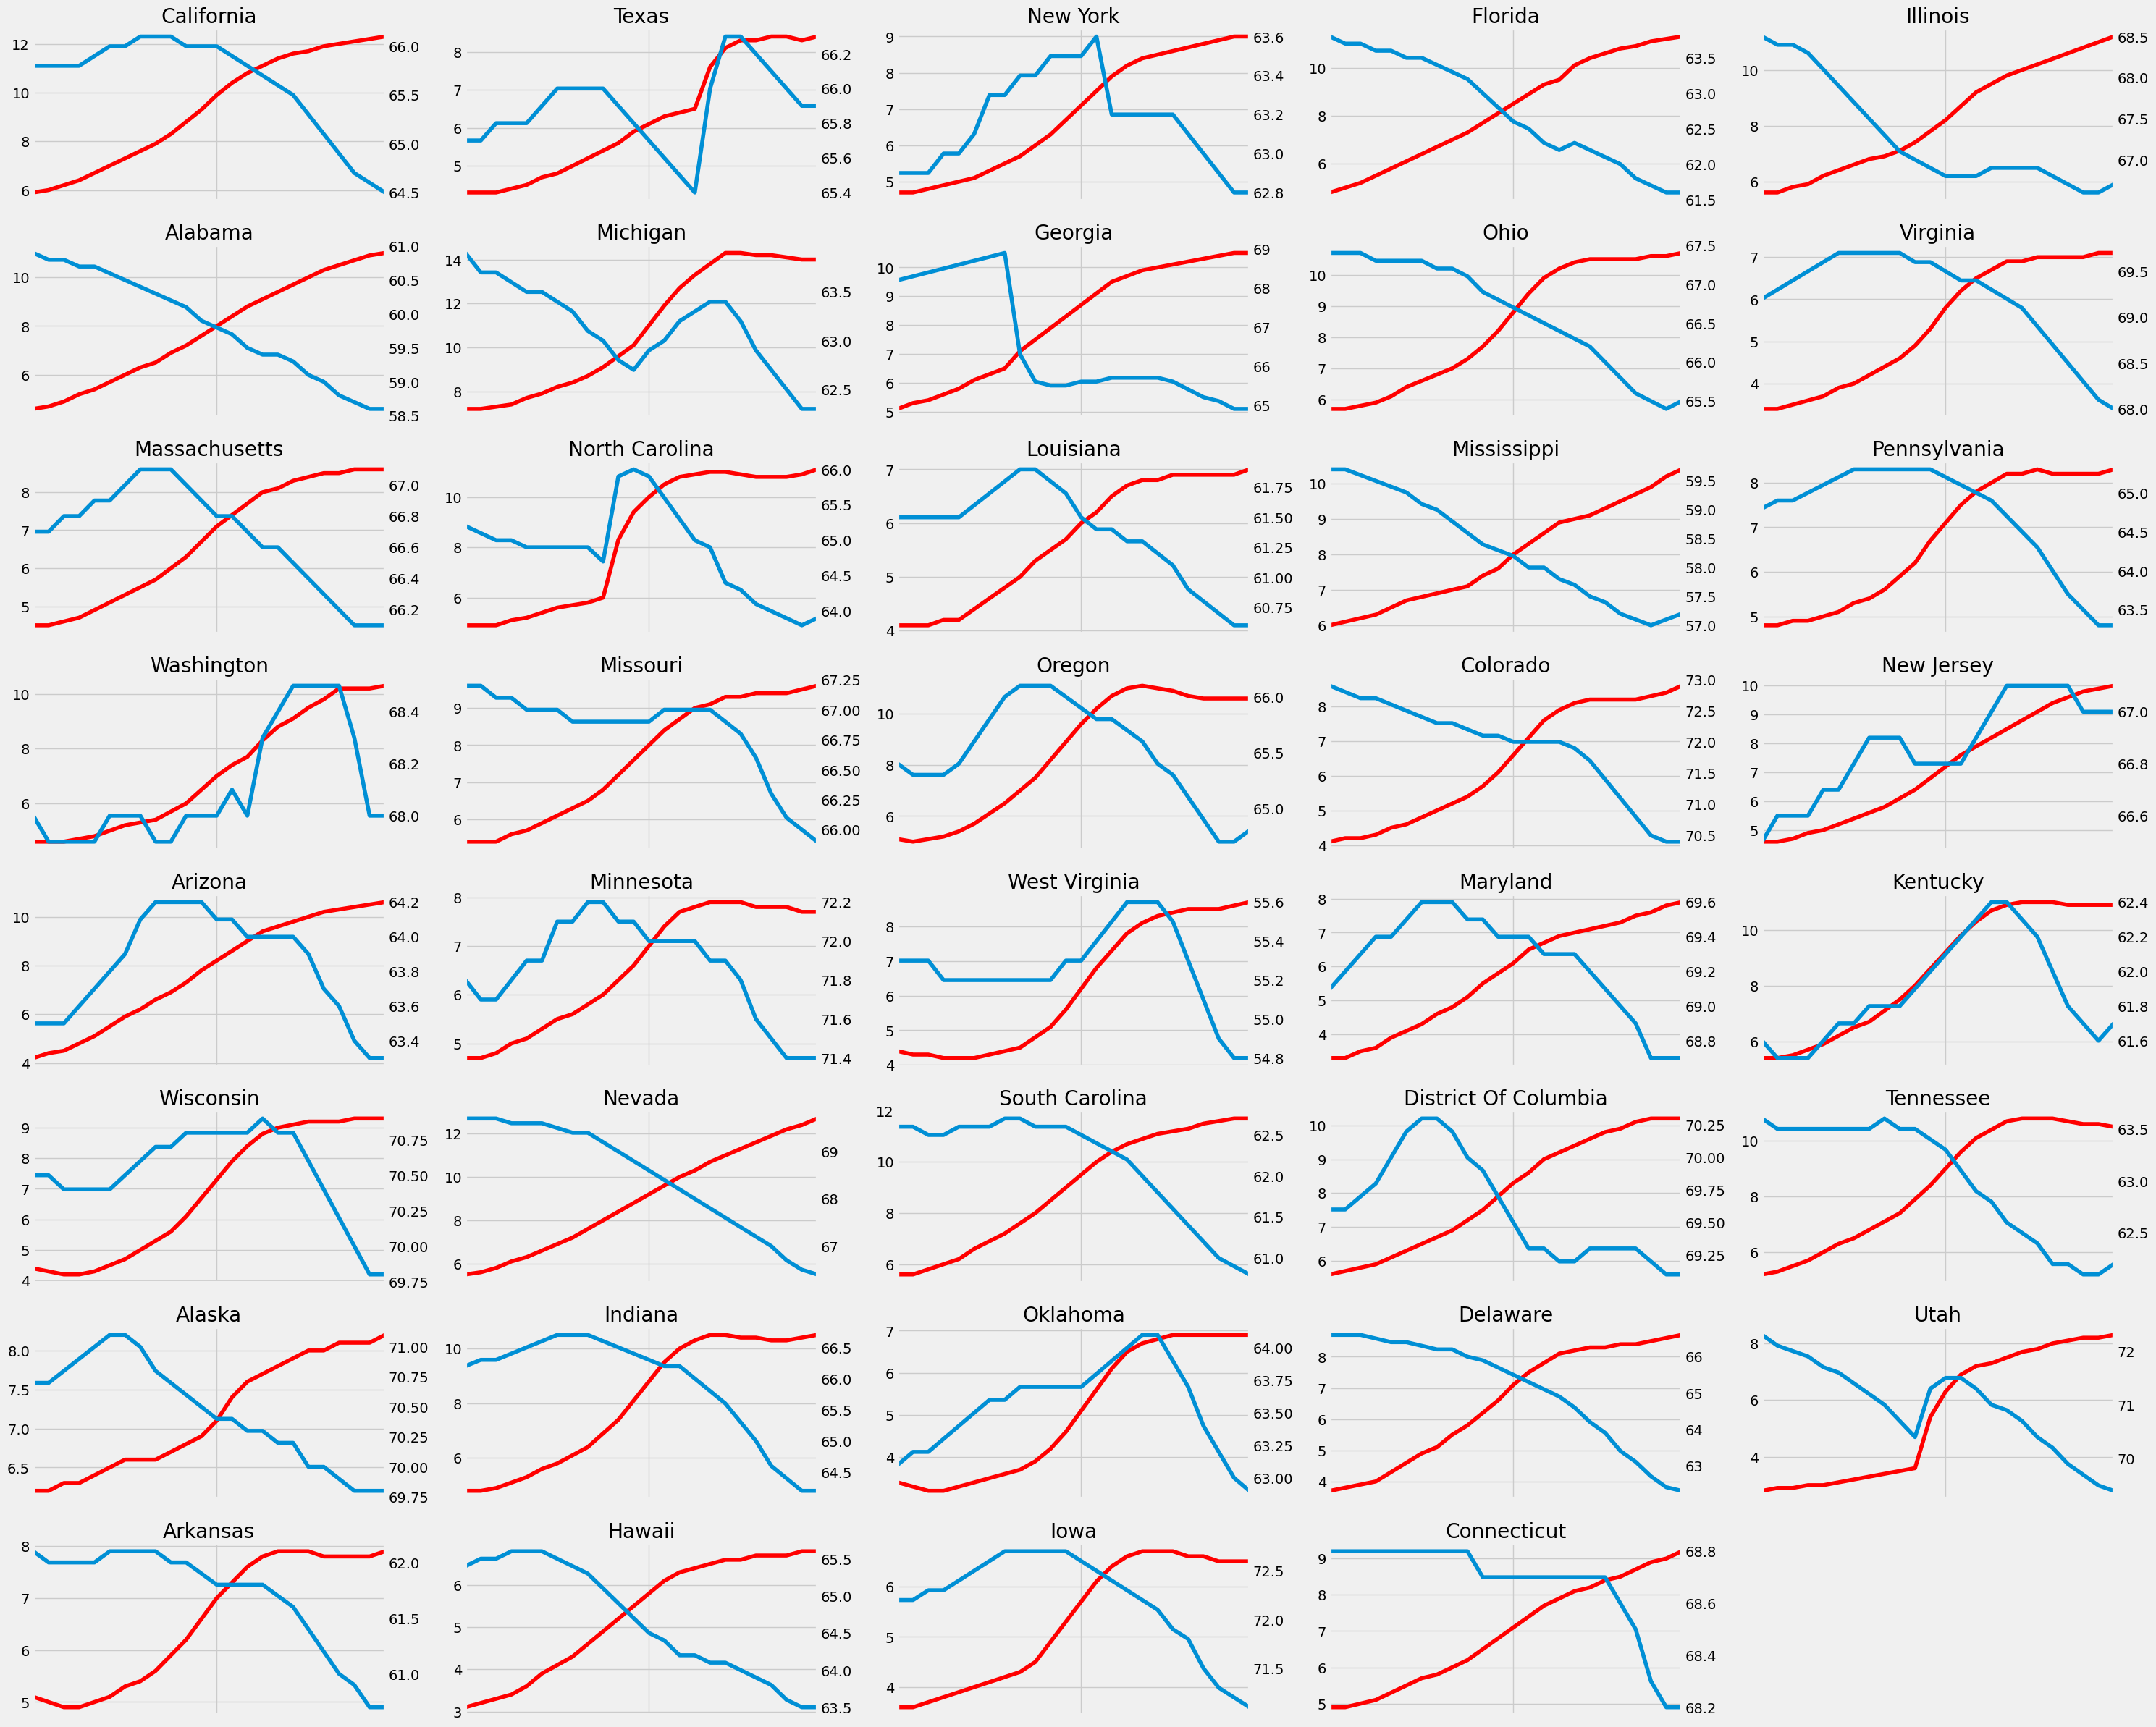

In [45]:
fig, axs = plt.subplots(10,5, figsize=(30,30), sharex=True)
axs = axs.flatten()

# iterate only over states present in both dataframes to avoid KeyError
common_states = unemp_states.columns.intersection(participation_states.columns)

i = 0
for state in common_states:
    
    ax2 = axs[i].twinx()
    unemp_states.loc[(unemp_states.index >= '2008-01-01') & (unemp_states.index < '2010-01-01'), state]\
        .plot(ax=axs[i], label='Unemployment', color='Red')
    participation_states.loc[(participation_states.index >= '2008-01-01') & (participation_states.index < '2010-01-01'), state]\
        .plot(ax=ax2, label='Participation')

    ax2.grid(False)
    axs[i].set_title(state)
    i += 1

# hide any unused subplots
for j in range(i, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()